In [1]:
import re 
import nltk 
import string
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

In [30]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
import string

In [2]:
data = pd.read_csv("E:\DEFENCE\Code\depression.csv",encoding='latin-1')
data.head()

,Index,message,label
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0
4,5,ah yeah robpattznews is always on top of this love her,0


In [4]:
positif_data = data[data.label==0].iloc[:25000,:]
print(positif_data.shape)
negative_data = data[data.label==1].iloc[:1000,:]
print(negative_data.shape)

(25000, 3)
(1000, 3)


In [5]:
stopwords=nltk.corpus.stopwords.words('english')

In [6]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [8]:
data['Clean_message'] = data['message'].str.replace("@", "") 
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww you cried thats a sign that i must see this movie lol
4,5,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews is always on top of this love her


In [9]:
data['Clean_message'] = data['Clean_message'].str.replace(r"http\S+", "") 
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected to be the worlds largest delayed until june sensible
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww you cried thats a sign that i must see this movie lol
4,5,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews is always on top of this love her


In [10]:
data['Clean_message'] = data['Clean_message'].str.replace("[^a-zA-Z]", " ") 
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected to be the worlds largest delayed until june sensible
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww you cried thats a sign that i must see this movie lol
4,5,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews is always on top of this love her


In [11]:
data['Clean_message'] = data['Clean_message'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everything hard life hard difficult everything fail give things difficult incompetent brain body really wish never born sometimes could new life completely different person dont see keep going lif...
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagus never need excuse long lunch spain fact think theres royal decree somewhere
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubais new airport expected worlds largest delayed june sensible
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww cried thats sign must see movie lol
4,5,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznews always top love


In [12]:
data['Clean_message'] = data['Clean_message'].apply(lambda x: x.split())
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,"[everything, hard, life, hard, difficult, everything, fail, give, things, difficult, incompetent, brain, body, really, wish, never, born, sometimes, could, new, life, completely, different, person..."
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,"[simonmagus, never, need, excuse, long, lunch, spain, fact, think, theres, royal, decree, somewhere]"
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,"[dubais, new, airport, expected, worlds, largest, delayed, june, sensible]"
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,"[hahah, daniel, aww, cried, thats, sign, must, see, movie, lol]"
4,5,ah yeah robpattznews is always on top of this love her,0,"[ah, yeah, robpattznews, always, top, love]"


In [13]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_message'] = data['Clean_message'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,"[everyth, hard, life, hard, difficult, everyth, fail, give, thing, difficult, incompet, brain, bodi, realli, wish, never, born, sometim, could, new, life, complet, differ, person, dont, see, keep,..."
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,"[simonmagu, never, need, excus, long, lunch, spain, fact, think, there, royal, decre, somewher]"
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,"[dubai, new, airport, expect, world, largest, delay, june, sensibl]"
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,"[hahah, daniel, aww, cri, that, sign, must, see, movi, lol]"
4,5,ah yeah robpattznews is always on top of this love her,0,"[ah, yeah, robpattznew, alway, top, love]"


In [14]:
data['Clean_message'] = data['Clean_message'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everyth hard life hard difficult everyth fail give thing difficult incompet brain bodi realli wish never born sometim could new life complet differ person dont see keep go life like play favorit g...
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagu never need excus long lunch spain fact think there royal decre somewher
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubai new airport expect world largest delay june sensibl
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel aww cri that sign must see movi lol
4,5,ah yeah robpattznews is always on top of this love her,0,ah yeah robpattznew alway top love


In [16]:
data['Clean_message'] = data['Clean_message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,Index,message,label,Clean_message
0,1,everything is too hard for me life is so hard and difficult for me everything that i do i fail i give up when things are too difficult for my incompetent brain and body i really wish i was never b...,1,everyth hard life hard difficult everyth fail give thing difficult incompet brain bodi realli wish never born sometim could life complet differ person dont keep life like play favorit game time fe...
1,2,simonmagus you never need an excuse for a long lunch in spain in fact i think theres a royal decree about it somewhere,0,simonmagu never need excus long lunch spain fact think there royal decre somewher
2,3,dubais new airport expected to be the worlds largest delayed until june sensible httpviigoimltr,0,dubai airport expect world largest delay june sensibl
3,4,hahah daniel aww you cried thats a sign that i must see this movie lol,0,hahah daniel that sign must movi
4,5,ah yeah robpattznews is always on top of this love her,0,yeah robpattznew alway love


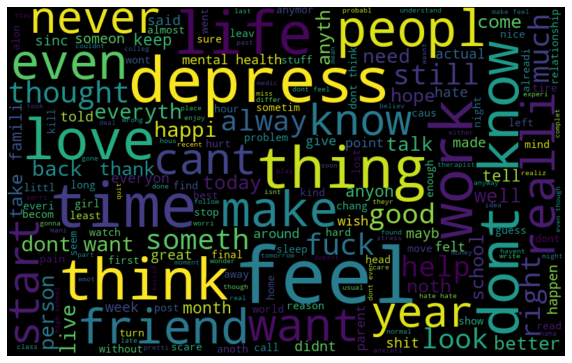

In [17]:
all_words = ' '.join([text for text in data['Clean_message']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

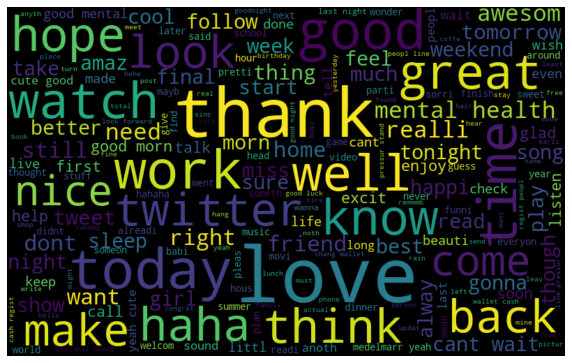

In [18]:
positive_words =' '.join([text for text in data['Clean_message'][data['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

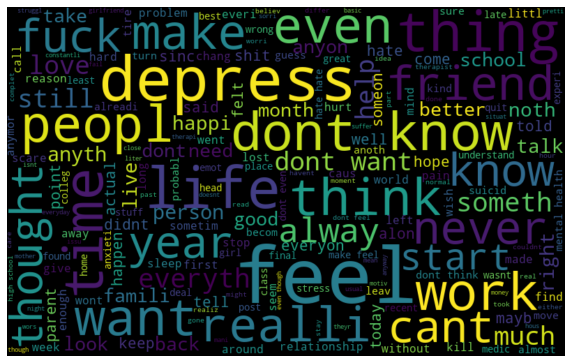

In [20]:
depressive_words =' '.join([text for text in data['Clean_message'][data['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [21]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score

In [23]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_message'])
cv.shape

(40622, 52456)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['label'] , test_size=.2,stratify=data['label'], random_state=42)

In [26]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.9412923076923077


In [27]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.9355076923076923


In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.944


In [29]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.9398153846153846


In [32]:
adc = AdaBoostClassifier(n_estimators=1000, random_state=0)
adc.fit(X_train, y_train)
prediction_adc = adc.predict(X_test)
print(accuracy_score(prediction_adc,y_test))

0.9400615384615385
